# 12 ノンパラメトリック検定（1）

## 12.1 二項検定

* いかさまコイン

In [25]:
binom.test(c(13, 7), p=1/2)


	Exact binomial test

data:  c(13, 7)
number of successes = 13, number of trials = 20, p-value = 0.2632
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.4078115 0.8460908
sample estimates:
probability of success 
                  0.65 


In [26]:
binom.test(c(65, 35), p=1/2)


	Exact binomial test

data:  c(65, 35)
number of successes = 65, number of trials = 100, p-value = 0.003518
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.5481506 0.7427062
sample estimates:
probability of success 
                  0.65 


## 12.2 $\chi^2$ 適合度検定

$$ X^2 = \sum\limits^n_{i=1}\frac{(O_i - E_i)^2}{E_i} $$

* メンデルの法則（分離の法則）

In [28]:
d2 <- matrix(c(152, 39, 53, 6, 140.625, 46.875, 46.875, 15.625), nrow=2, ncol=4, byrow=TRUE)
d2

152.000,39.000,53.000,6.000
140.625,46.875,46.875,15.625


$X^2$ 値

In [30]:
sum((d2[1,] - d2[2,])**2 / d2[2,])

[1] 8.972444

棄却域

In [31]:
qchisq(0.95, df=3)

[1] 7.814728

In [32]:
chisq.test(d2[1,], p= d2[2,], rescale=TRUE)


	Chi-squared test for given probabilities

data:  d2[1, ]
X-squared = 8.9724, df = 3, p-value = 0.02966


有意確率

In [33]:
pchisq(8.9724, df=3, lower.tail = FALSE)

[1] 0.0296601

小標本の場合は $X^2$ と $\chi^2$分布 が合わないので，補正をする

* イェーツの連続性補正（コクランの条件）

$$ X^2 = \sum\limits^m_{i=1}\frac{(|O_i - E_i| - 0.5)^2}{E_i} $$

* 正確$\chi^2検定$

独立性検定ならば

* フィッシャーの正確確率検定

例題: アズキゾウムシ

In [37]:
d3 <- matrix(c(0:7, 
               0, 0, 60, 101, 84, 48, 7, 0, 
               9.35, 32.39, 56.20, 65.00, 56.39, 39.14, 22.63, 19.06), nrow=3, ncol=8, byrow=TRUE)
print(d3)

     [,1]  [,2] [,3] [,4]  [,5]  [,6]  [,7]  [,8]
[1,] 0.00  1.00  2.0    3  4.00  5.00  6.00  7.00
[2,] 0.00  0.00 60.0  101 84.00 48.00  7.00  0.00
[3,] 9.35 32.39 56.2   65 56.39 39.14 22.63 19.06


In [40]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [46]:
d3[c(1:2),] %>% apply(2, function(x){rep(x[1], x[2])}) %>% unlist() %>% 
    hist(br=seq(-0.5, 9.5, 1), plot=FALSE)

$breaks
 [1] -0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5

$counts
 [1]   0   0  60 101  84  48   7   0   0   0

$density
 [1] 0.00000000 0.00000000 0.20000000 0.33666667 0.28000000 0.16000000
 [7] 0.02333333 0.00000000 0.00000000 0.00000000

$mids
 [1] 0 1 2 3 4 5 6 7 8 9

$xname
[1] "."

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

In [48]:
options(repr.plot.width=4, repr.plot.height=4)

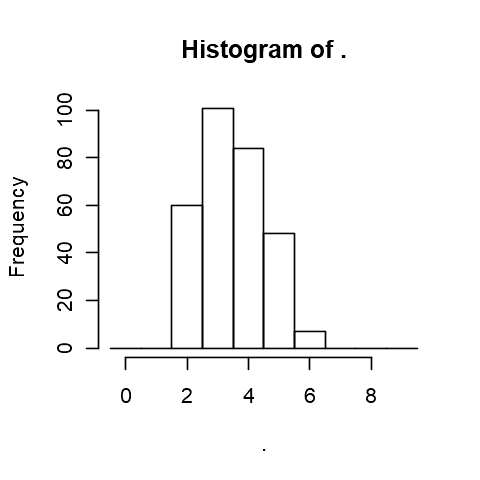

In [49]:
d3[c(1:2),] %>% apply(2, function(x){rep(x[1], x[2])}) %>% unlist() %>% 
    hist(br=seq(-0.5, 9.5, 1), plot=TRUE)

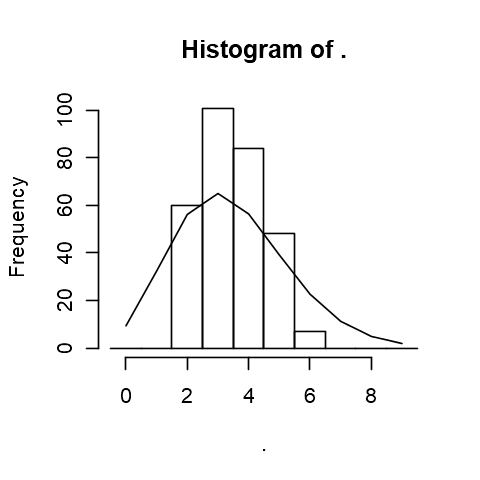

In [62]:
egg <- d3[c(1:2),] %>% apply(2, function(x){rep(x[1], x[2])}) %>% unlist()
plt.d3 <-  egg %>% hist(br=seq(-0.5, 9.5, 1), plot=TRUE)
egg.expected <- length(egg) * dpois(c(0:9), mean(egg))
lines(plt.d3$mids, egg.expected)

In [82]:
res.d3 <- rbind(plt.d3$counts, egg.expected)
res.d3

,0.000000,0.00000,60.00000,101.00000,84.00000,48.00000,7.00000,0.00000,0.000000,0.000000
egg.expected,9.335109,32.39283,56.20156,65.00647,56.39311,39.13682,22.63413,11.22006,4.866701,1.876384


In [83]:
rownames(res.d3) <- c("O", "E")
colnames(res.d3) <- plt.d3$mids
res.d3

,0,1,2,3,4,5,6,7,8,9
O,0.000000,0.00000,60.00000,101.00000,84.00000,48.00000,7.00000,0.00000,0.000000,0.000000
E,9.335109,32.39283,56.20156,65.00647,56.39311,39.13682,22.63413,11.22006,4.866701,1.876384


In [84]:
res.d3[,8]

O        E 
 0.00000 11.22006

In [85]:
res.d3[,c(8:10)]

,7,8,9
O,0.00000,0.000000,0.000000
E,11.22006,4.866701,1.876384


In [86]:
res.d3[, 8] <- apply(res.d3[,c(8:10)], 1, sum)
res.d3

,0,1,2,3,4,5,6,7,8,9
O,0.000000,0.00000,60.00000,101.00000,84.00000,48.00000,7.00000,0.00000,0.000000,0.000000
E,9.335109,32.39283,56.20156,65.00647,56.39311,39.13682,22.63413,17.96315,4.866701,1.876384


In [87]:
res.d3 <- res.d3[, c(-9, -10)]
res.d3

,0,1,2,3,4,5,6,7
O,0.000000,0.00000,60.00000,101.00000,84.00000,48.00000,7.00000,0.00000
E,9.335109,32.39283,56.20156,65.00647,56.39311,39.13682,22.63413,17.96315


In [88]:
chisq.test(res.d3["O",], p=res.d3["E",], rescale=TRUE)


	Chi-squared test for given probabilities

data:  res.d3["O", ]
X-squared = 105.86, df = 7, p-value < 2.2e-16


`chisq.test()` は外部仮説

今回は 内部仮説

自由度が変わるので，有意確率は別に求める

本文では `e-21` になっているが

In [90]:
pchisq(105.8636, df=6, lower.tail = FALSE)

[1] 1.495617e-20

## 12.3 正確$\chi^2$検定: モンテカルロシミュレーション

"引数の`p=exp`は期待度数（expected）を意味し..." と書いてあるが，`exp` は前のページで作った変数（206ページで作ったポアソン乱数）

In [93]:
chisq.test(res.d3["O",], p=res.d3["E",], rescale=TRUE, simulate.p.value=TRUE, B=10000)


	Chi-squared test for given probabilities with simulated p-value (based
	on 10000 replicates)

data:  res.d3["O", ]
X-squared = 105.86, df = NA, p-value = 9.999e-05


## 12.4 $\chi^2$独立性検定

In [94]:
d4 <- matrix(c(25, 15, 10, 30), nrow=2, ncol=2, byrow=TRUE)
print(d4)

     [,1] [,2]
[1,]   25   15
[2,]   10   30


In [96]:
rowSums(d4)

[1] 40 40

In [97]:
colSums(d4)

[1] 35 45

In [98]:
sum(d4)

[1] 80

In [104]:
d4.expected <- matrix(rep(rowSums(d4) *colSums(d4) / sum(d4), 2), nrow=2, ncol=2, byrow=TRUE)
print(d4.expected)

     [,1] [,2]
[1,] 17.5 22.5
[2,] 17.5 22.5


$X^2$ 値

In [105]:
sum((d4 - d4.expected)**2 / d4.expected)

[1] 11.42857

棄却値

In [109]:
qchisq(0.05, df=1, lower.tail = FALSE)

[1] 3.841459

In [110]:
chisq.test(d4)


	Pearson's Chi-squared test with Yates' continuity correction

data:  d4
X-squared = 9.9556, df = 1, p-value = 0.001604


補正なし

In [111]:
chisq.test(d4, correct=FALSE)


	Pearson's Chi-squared test

data:  d4
X-squared = 11.429, df = 1, p-value = 0.0007232


## 12.5 $\chi^2$独立性検定 vs. 分割表の対数尤度比検定（G検定）

In [112]:
hair <- matrix(c(32, 43, 16, 9, 55, 65, 64, 16), nrow=2, ncol=4, byrow=TRUE)
print(hair)

     [,1] [,2] [,3] [,4]
[1,]   32   43   16    9
[2,]   55   65   64   16


In [114]:
chisq.test(hair)


	Pearson's Chi-squared test

data:  hair
X-squared = 8.9872, df = 3, p-value = 0.02946


$$ G = 2\left[ \sum\limits^m_{i=1}\sum\limits^n_{j=1}O_n\ln\left(\frac{O_{ij}}{E_{ij}}\right) \right] $$

In [115]:
devtools::dev_mode(TRUE, "Chap12")

Dev mode: ON


In [119]:
library("Deducer")

Warning message:
"package 'Deducer' was built under R version 3.3.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"Loading required package: JGR
Warning message:
"package 'JGR' was built under R version 3.3.3"Loading required package: rJava
Loading required package: JavaGD
Loading required package: iplots
Warning message:
"package 'iplots' was built under R version 3.3.3"
Please type JGR() to launch console. Platform specific launchers (.exe and .app) can also be obtained at http://www.rforge.net/JGR/files/.


Loading required package: car
Warning message:
"package 'car' was built under R version 3.3.3"Warning message:
"replacing previous import 'lme4::sigma' by 'stats::sigma' when loading 'pbkrtest'"
Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode

Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



Note Non-JGR co

In [120]:
likelihood.test(hair)


	Log likelihood ratio (G-test) test of independence without correction

data:  hair
Log likelihood ratio statistic (G) = 9.5121, X-squared df = 3, p-value
= 0.0232


In [122]:
devtools::dev_mode(FALSE)

Dev mode: OFF


## 12.6 フィッシャーの正確確率法

* 超幾何分布

$$ P(X=k) = \frac{\binom{K}{k} \binom{N-K}{n-k} }{\binom{N}{k}} $$

$$ p = \frac{(a+b)!(c+d)!(a+c)!(b+d)!}{N!a!b!c!d!} $$

例題: 淡水性巻貝2種の水流への耐性

In [123]:
shellfish.a <- matrix(c(12, 7, 2, 9), 2, 2, TRUE)
shellfish.a

12,7
2,9


In [124]:
shellfish.b <- matrix(c(13, 6, 1, 10), 2, 2, TRUE)

In [125]:
shellfish.c <- matrix(c(14, 5, 0, 11), 2, 2, TRUE)

In [126]:
fisher.test(shellfish.a, alternative = "greater")


	Fisher's Exact Test for Count Data

data:  shellfish.a
p-value = 0.02119
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 1.331695      Inf
sample estimates:
odds ratio 
  7.166131 


In [127]:
fisher.test(shellfish.b, alternative = "greater")


	Fisher's Exact Test for Count Data

data:  shellfish.b
p-value = 0.002132
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 2.551358      Inf
sample estimates:
odds ratio 
  19.30456 


In [128]:
fisher.test(shellfish.c, alternative = "greater")


	Fisher's Exact Test for Count Data

data:  shellfish.c
p-value = 7.996e-05
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 5.92269     Inf
sample estimates:
odds ratio 
       Inf 


例題: 髪の色

In [129]:
fisher.test(hair)


	Fisher's Exact Test for Count Data

data:  hair
p-value = 0.0241
alternative hypothesis: two.sided


## 12.7 オッズ比

オッズ比（$\hat{\theta}$）

$$ \hat{\theta} = \frac{p/(1-p)}{q/(1-q)} $$

2 $\times$ 2 分割表では，

$$ \hat{\theta} = \frac{a_{11}a_{22}}{a_{12}a_{21}} $$

対数オッズ比: 正規分布に収束

$$ \ln\hat{\theta} = \ln a_{11} + \ln a_{22} - \ln a_{12} - \ln a_{21}$$

標準誤差は，

$$ SE(\ln \hat{\theta}) = \sqrt{\frac{1}{a_{11}} + \frac{1}{a_{22}} + \frac{1}{a_{12}} + \frac{1}{a_{21}}} $$

In [130]:
ls()

[1] "d2"           "d3"           "d3.expected"  "d4"           "d4.expected" 
 [6] "egg"          "egg.expected" "hair"         "plt.d3"       "res.d3"      
[11] "shellfish.a"  "shellfish.b"  "shellfish.c"

In [131]:
d5 <- matrix(c(54, 10325, 25, 51790), 2, 2, TRUE)
d5

54,10325
25,51790


オッズ比

In [133]:
d5[1] * d5[4] / (d5[2] * d5[3])

[1] 10.83452

対数オッズ比

In [137]:
log(d5[1]) + log(d5[4]) - log(d5[2]) - log(d5[3])

[1] 2.382737

対数オッズ比の標準誤差

In [138]:
sqrt(1/d5[1] + 1/d5[2] + 1/d5[3] + 1/d5[4])

[1] 0.242146

95%信頼区間

In [158]:
qnorm(c(0.025, 0.975))

[1] -1.959964  1.959964

In [157]:
2.382737 + qnorm(c(0.025, 0.975)) * 0.242145

[1] 1.908142 2.857332

In [156]:
exp(2.382737 + qnorm(c(0.025, 0.975)) * 0.242145)

[1]  6.74055 17.41501

手計算は Agresti (2013)らしい

In [146]:
fisher.test(d5, or=TRUE, conf.level = 0.95)


	Fisher's Exact Test for Count Data

data:  d5
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to TRUE
95 percent confidence interval:
  6.623513 18.173941
sample estimates:
odds ratio 
  10.83069 


In [159]:
devtools::session_info()

Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------


 setting  value                       
 version  R version 3.3.2 (2016-10-31)
 system   x86_64, mingw32             
 ui       RTerm                       
 language en                          
 collate  Japanese_Japan.932          
 tz       Asia/Tokyo                  
 date     2017-07-19                  

 package      * version    date       source                            
 assertthat     0.2.0      2017-04-11 CRAN (R 3.3.2)                    
 Cairo          1.5-9      2015-09-26 CRAN (R 3.2.2)                    
 car          * 2.1-4      2016-12-02 CRAN (R 3.3.3)                    
 class          7.3-14     2015-08-30 CRAN (R 3.3.2)                    
 codetools      0.2-15     2016-10-05 CRAN (R 3.3.2)                    
 colorspace     1.3-2      2016-12-14 CRAN (R 3.3.3)                    
 crayon         1.3.2      2016-06-28 CRAN (R 3.3.1)                    
 Deducer      * 0.7-9      2015-12-29 CRAN (R 3.3.3)                    
 devtools       1.12.0     201